## Frequent itemsets

In [2]:
import os
import requests
import random
import gzip
import io
import re
import binascii
import itertools
from time import time


In [3]:
# Function to download and unzip the BibTeX file
def download_and_unzip_bibtex(url):
    response = requests.get(url)
    bibtex_gz_data = io.BytesIO(response.content)

    with gzip.open(bibtex_gz_data, "rt", encoding="utf-8") as f:
        # Read and display the first few lines
        for _ in range(70):
            print(f.readline().strip())


In [4]:
bib_url = "https://aclanthology.org/anthology+abstracts.bib.gz"
print("Displaying the first few lines of the BibTeX file:")
download_and_unzip_bibtex(bib_url)

Displaying the first few lines of the BibTeX file:
% https://aclanthology.org/anthology+abstracts.bib.gz generated on 2024-02-29

@proceedings{yrrsds-2023-young,
title = "Proceedings of the 19th Annual Meeting of the Young Reseachers' Roundtable on Spoken Dialogue Systems",
editor = "Hudecek, Vojtech  and
Schmidtova, Patricia  and
Dinkar, Tanvi  and
Chiyah-Garcia, Javier  and
Sieinska, Weronika",
month = sep,
year = "2023",
address = "Prague, Czechia",
publisher = "Association for Computational Linguistics",
url = "https://aclanthology.org/2023.yrrsds-1.0",
}
@inproceedings{chiyah-garcia-2023-processing,
title = "Processing Referential Ambiguities in Situated Dialogue Systems",
author = "Chiyah-Garcia, Javier",
editor = "Hudecek, Vojtech  and
Schmidtova, Patricia  and
Dinkar, Tanvi  and
Chiyah-Garcia, Javier  and
Sieinska, Weronika",
booktitle = "Proceedings of the 19th Annual Meeting of the Young Reseachers' Roundtable on Spoken Dialogue Systems",
month = sep,
year = "2023",
address =

In [5]:
# Function to download and unzip the BibTeX file
def download_and_unzip_bibtex(url):
    response = requests.get(url)
    bibtex_gz_data = io.BytesIO(response.content)

    with gzip.open(bibtex_gz_data, "rt", encoding="utf-8") as f:
        # Read and display the first few lines
        for _ in range(70):
            print(f.readline().strip())


In [6]:
# Function to download and unzip the BibTeX file
def download_and_unzip_bibtex(url):
    response = requests.get(url)
    bibtex_gz_data = io.BytesIO(response.content)

    with gzip.open(bibtex_gz_data, "rt", encoding="utf-8") as f:
        return f.read()

# Function to extract titles, abstracts, editors, authors, and publishers from the BibTeX data
def extract_titles_and_abstracts(bibtex_data):
    titles_and_abstracts = re.findall(r'title = "(.*?)".*?abstract = "(.*?)".*?editor = "(.*?)".*?author = "(.*?)".*?publisher = "(.*?)".*?url = "(.*?)",', bibtex_data, re.DOTALL)
    return titles_and_abstracts


# Function to randomly select titles and abstracts
def select_random_titles_and_abstracts(titles_and_abstracts, num_samples):
    return random.sample(titles_and_abstracts, k=num_samples)

# Function to save titles, abstracts, editors, authors, and publishers into text files
def save_titles_and_abstracts(titles_and_abstracts):
    folder_name = "project1"
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    for idx, (title, abstract, editor, author, publisher, url) in enumerate(titles_and_abstracts, 1):
        file_name = f"{idx}.txt"
        file_path = os.path.join(folder_name, file_name)
        with open(file_path, "w", encoding="utf-8") as file:
            file.write(f"URL: {url}\nTitle: {title}\nAbstract:\n{abstract}\nEditor: {editor}\nAuthor: {author}\nPublisher: {publisher}\n")



In [7]:
bib_url = "https://aclanthology.org/anthology+abstracts.bib.gz"
print("Downloading and extracting titles and abstracts...")
bibtex_data = download_and_unzip_bibtex(bib_url)
titles_and_abstracts = extract_titles_and_abstracts(bibtex_data)
selected_titles_and_abstracts = select_random_titles_and_abstracts(titles_and_abstracts, 1000)
# Save selected titles and abstracts into text files
save_titles_and_abstracts(selected_titles_and_abstracts)
print("Randomly selected titles and abstracts saved to text files in project1 folder.")

Randomly selected titles and abstracts saved to text files in project1 folder.


# Anthor and Editor in 2 lines and separated - 2 baskets


In [8]:
# Function to read editor and author information from a file
def read_editor_and_author(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
        # Extract editor information
        editor_start_idx = content.find("Editor:") + len("Editor:")
        editor_end_idx = content.find("Author:")
        editors = content[editor_start_idx:editor_end_idx].strip().replace(" and", ",").replace(", ", ",").replace("\n", "").strip()
        # Extract author information
        author_start_idx = content.find("Author:") + len("Author:")
        author_end_idx = content.find("Publisher:")
        authors = content[author_start_idx:author_end_idx].strip().replace(" and", ",").replace(", ", ",").replace("\n", "").strip()
        # Remove spaces between commas and replace 'and' with ','
        editors = editors.replace(", ", ",").replace(" and", ",")
        authors = authors.replace(", ", ",").replace(" and", ",")
        # Remove additional spaces between names
        editors = ",".join(editor.strip() for editor in editors.split(","))
        authors = ",".join(author.strip() for author in authors.split(","))
        # Remove non-alphabetic symbols
        editors = re.sub(r'[^a-zA-Z,]', '', editors)
        authors = re.sub(r'[^a-zA-Z,]', '', authors)
        return editors, authors

# Function to write editor and author information to data.txt
def write_editor_and_author_to_data(editors, authors):
    with open("data.txt", "a", encoding="utf-8") as data_file:
        data_file.write(editors + "\n")
        data_file.write(authors + "\n")

# Clear data.txt before writing new data
open("data.txt", "w").close()

# Iterate over files in the "project1" folder
folder_name = "project1"
for filename in os.listdir(folder_name):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_name, filename)
        editors, authors = read_editor_and_author(file_path)
        write_editor_and_author_to_data(editors, authors)

print("Editor and Author information written to data.txt")


Editor and Author information written to data.txt


# Anthor and Editor in one line in txt file  ...I did not run it .... the result was not acceptable.

In [ ]:
# Not  NOt  NOt

import os
import re

# Function to read editor and author information from a file
def read_editor_and_author(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        content = file.read()
        # Extract editor information
        editor_start_idx = content.find("Editor:") + len("Editor:")
        editor_end_idx = content.find("Author:")
        editors = content[editor_start_idx:editor_end_idx].strip().replace(" and", ",").replace(", ", ",").replace("\n", "").strip()
        # Extract author information
        author_start_idx = content.find("Author:") + len("Author:")
        author_end_idx = content.find("Publisher:")
        authors = content[author_start_idx:author_end_idx].strip().replace(" and", ",").replace(", ", ",").replace("\n", "").strip()
        # Remove spaces between commas and replace 'and' with ','
        editors = editors.replace(", ", ",").replace(" and", ",")
        authors = authors.replace(", ", ",").replace(" and", ",")
        # Remove additional spaces between names
        editors = ",".join(editor.strip() for editor in editors.split(","))
        authors = ",".join(author.strip() for author in authors.split(","))
        # Remove non-alphabetic symbols
        editors = re.sub(r'[^a-zA-Z,]', '', editors)
        authors = re.sub(r'[^a-zA-Z,]', '', authors)
        return editors, authors

# Function to write editor and author information to data.txt
def write_editor_and_author_to_data(editors, authors):
    with open("data.txt", "a", encoding="utf-8") as data_file:
        data_file.write(f"{editors},{authors}\n")

# Clear data.txt before writing new data
open("data.txt", "w").close()

# Iterate over files in the "project1" folder
folder_name = "project1"
for filename in os.listdir(folder_name):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_name, filename)
        editors, authors = read_editor_and_author(file_path)
        write_editor_and_author_to_data(editors, authors)

print("Editor and Author information written to data.txt")


Editor and Author information written to data.txt


#The baskets

In [17]:
with open("/content/data.txt", "rt", encoding='latin1') as f:
    lines = f.readlines()

lines = [l.replace('\n', '') for l in lines]

for l in lines[:50]:
    print(l)

Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian
Lees,Alyssa,Borkan,Daniel,Kivlichan,Ian,Nario,Jorge,Goyal,Tesh
Bouamor,Houda,Pino,Juan,Bali,Kalika
Wu,Yuhao,Sharma,Karthick,Seah,Chun,Zhang,Shuhao
Koehn,Philipp,Haddow,Barry,Kocmi,Tom,Monz,Christof
Zhang,Jingyi,deMelo,Gerard,Xu,Hongfei,Chen,Kehai
Kumar,Ritesh,Ojha,AtulKr,Zampieri,Marcos,Malmasi,Shervin
Sharma,Sanjana,Agrawal,Saksham,Shrivastava,Manish
Inui,Kentaro,Jiang,Jing,Ng,Vincent,Wan,Xiaojun
Agashe,Rajas,Iyer,Srinivasan,Zettlemoyer,Luke
Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki
Liang,Jianxin,Liu,Chang,Tao,Chongyang,Feng,Jiazhan,Zhao,Dongyan
Apidianaki,Marianna,Mohammad,SaifM,May,Jonathan,Shutova,Ekaterina,Bethard,Steven,Carpuat,Marine
Karasalo,Maja,Nilsson,Mattias,Rosell,Magnus,WickenbergBolin,Ulrika
Morin,Emmanuel,Rosset,Sophie,Zweigenbaum,Pierre
Meftah,Sara,Semmar,Nasredine,Tamaazousti,Youssef,Essafi,Hassane,Sadat,Fatiha
Stein,Benno,Wachsmuth,Henning
Niven,Timothy,Kao,HungYu
Bhattacharyya,Pushpak,Sharma,Di

In [18]:
# Function to count the number of baskets in the data.txt file
def count_baskets(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return sum(1 for line in file)

# Path to the data.txt file
data_file_path = "data.txt"
# Count the number of baskets
basket_count = count_baskets(data_file_path)
print("Number of baskets:", basket_count)
#print(file_path)

Number of baskets: 2000


#Naive Algoritm

In [19]:
import itertools
def readdata(k, fname="/content/data.txt", report=False):
    C_k = []
    b = 0

    with open(fname, "rt", encoding='latin1') as f:
        for line in f:
            line = line.replace('\n', '')  # remove newline symbol
            if report:
                print(line)

            if line != "":
                # gather all items in one basket
                C_k.append(line)
            else:
                # end of basket, report all itemsets
                for itemset in itertools.combinations(C_k, k):
                    yield frozenset(itemset)
                C_k = []

                if report:
                    print("")

                # report progress
                # print every 1000th element to reduce clutter
                if report:
                    if b % 1000 == 0:
                        print('processing bin ', b)
                    b += 1

    # last basket
    if len(C_k) > 0:
        for itemset in itertools.combinations(C_k, k):
            yield frozenset(itemset)


In [20]:
nitems = 21
for C_k in readdata(k=1, report=True):
    print(C_k)
    nitems -= 1

    if nitems == 0:
        break

Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian
Lees,Alyssa,Borkan,Daniel,Kivlichan,Ian,Nario,Jorge,Goyal,Tesh
Bouamor,Houda,Pino,Juan,Bali,Kalika
Wu,Yuhao,Sharma,Karthick,Seah,Chun,Zhang,Shuhao
Koehn,Philipp,Haddow,Barry,Kocmi,Tom,Monz,Christof
Zhang,Jingyi,deMelo,Gerard,Xu,Hongfei,Chen,Kehai
Kumar,Ritesh,Ojha,AtulKr,Zampieri,Marcos,Malmasi,Shervin
Sharma,Sanjana,Agrawal,Saksham,Shrivastava,Manish
Inui,Kentaro,Jiang,Jing,Ng,Vincent,Wan,Xiaojun
Agashe,Rajas,Iyer,Srinivasan,Zettlemoyer,Luke
Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki
Liang,Jianxin,Liu,Chang,Tao,Chongyang,Feng,Jiazhan,Zhao,Dongyan
Apidianaki,Marianna,Mohammad,SaifM,May,Jonathan,Shutova,Ekaterina,Bethard,Steven,Carpuat,Marine
Karasalo,Maja,Nilsson,Mattias,Rosell,Magnus,WickenbergBolin,Ulrika
Morin,Emmanuel,Rosset,Sophie,Zweigenbaum,Pierre
Meftah,Sara,Semmar,Nasredine,Tamaazousti,Youssef,Essafi,Hassane,Sadat,Fatiha
Stein,Benno,Wachsmuth,Henning
Niven,Timothy,Kao,HungYu
Bhattacharyya,Pushpak,Sharma,Di

In [21]:
import time

def get_C(k):

    start = time.time()
    C = {}
    for key in readdata(k):  # False report
        if key not in C:
            C[key] = 1
        else:
            C[key] += 1
    print("Took {}s for k={}".format((time.time() - start), k))
    return C


C1 = get_C(1)
C2 = get_C(2)

Took 0.006148338317871094s for k=1
Took 3.0701920986175537s for k=2


In [22]:
print(len(C1),len(C2))

1328 881267


In [23]:
nitems = 20
for ck,n in C2.items():
    print(ck, n)
    nitems -= 1
    if nitems == 0: break

frozenset({'Lees,Alyssa,Borkan,Daniel,Kivlichan,Ian,Nario,Jorge,Goyal,Tesh', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 1
frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 44
frozenset({'Wu,Yuhao,Sharma,Karthick,Seah,Chun,Zhang,Shuhao', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 1
frozenset({'Koehn,Philipp,Haddow,Barry,Kocmi,Tom,Monz,Christof', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 2
frozenset({'Zhang,Jingyi,deMelo,Gerard,Xu,Hongfei,Chen,Kehai', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 1
frozenset({'Kumar,Ritesh,Ojha,AtulKr,Zampieri,Marcos,Malmasi,Shervin', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 1
frozenset({'Sharma,Sanjana,Agrawal,Saksham,Shrivastava,Manish', 'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}) 1
frozenset({'Inu

In [24]:
%time
def get_frequent_items(C, s):
    L = {}
    for key, n in C.items():
        if n >= s:
            L[key] = n
    print('{} items with >{} occurrences'.format(len(L), s))
    return L

s_values = [10, 50, 100]  # List of support thresholds

for s in s_values:
    print(f"For s = {s}:")
    L2 = get_frequent_items(C2, s)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs
For s = 10:
35849 items with >10 occurrences
For s = 50:
2607 items with >50 occurrences
For s = 100:
702 items with >100 occurrences


In [25]:
naive_result = L2
naive_result

{frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika',
            'Inui,Kentaro,Jiang,Jing,Ng,Vincent,Wan,Xiaojun'}): 968,
 frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika',
            'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki'}): 2244,
 frozenset({'Apidianaki,Marianna,Mohammad,SaifM,May,Jonathan,Shutova,Ekaterina,Bethard,Steven,Carpuat,Marine',
            'Bouamor,Houda,Pino,Juan,Bali,Kalika'}): 176,
 frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika',
            'Morin,Emmanuel,Rosset,Sophie,Zweigenbaum,Pierre'}): 132,
 frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika',
            'GonzalezHernandez,Graciela,Klein,AriZ,Flores,Ivan,Weissenbacher,Davy,Magge,Arjun,OConnor,Karen,Sarker,Abeed,Minard,AnneLyse,Tutubalina,Elena,Miftahutdinov,Zulfat,Alimova,Ilseyar'}): 132,
 frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika',
            'Toutanova,Kristina,Rumshisky,Anna,Zettlemoyer,Luke,HakkaniTur,Dilek,Beltagy,Iz,Bethard,Steven,Cotterell,Ryan,Chakraborty,Tanmoy,Zhou,Yichao'}): 440,
 frozen

In [26]:
L2 = [elem for elem in list(L2) if len(elem) > 1]  # clean our the list a bit.

In [27]:
for i in range(len(L2)):

    A, B = list(L2[i])
    support_AB = C2[frozenset([A, B])]
    support_A = C1[frozenset([A])]
    conf_A_leads_to_B = support_AB / support_A

    support_B = C1[frozenset([B])]
    prob_B = support_B / basket_count

    interest_A_leads_to_B = conf_A_leads_to_B - prob_B

    if interest_A_leads_to_B > 0.7:
        print("{} --> {} with interest {:3f}".format(A, B,
                                                     interest_A_leads_to_B))

Bouamor,Houda,Pino,Juan,Bali,Kalika --> Inui,Kentaro,Jiang,Jing,Ng,Vincent,Wan,Xiaojun with interest 21.989000
Bouamor,Houda,Pino,Juan,Bali,Kalika --> Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki with interest 50.974500
Bouamor,Houda,Pino,Juan,Bali,Kalika --> Apidianaki,Marianna,Mohammad,SaifM,May,Jonathan,Shutova,Ekaterina,Bethard,Steven,Carpuat,Marine with interest 3.998000
Bouamor,Houda,Pino,Juan,Bali,Kalika --> Morin,Emmanuel,Rosset,Sophie,Zweigenbaum,Pierre with interest 2.998500
GonzalezHernandez,Graciela,Klein,AriZ,Flores,Ivan,Weissenbacher,Davy,Magge,Arjun,OConnor,Karen,Sarker,Abeed,Minard,AnneLyse,Tutubalina,Elena,Miftahutdinov,Zulfat,Alimova,Ilseyar --> Bouamor,Houda,Pino,Juan,Bali,Kalika with interest 43.978000
Bouamor,Houda,Pino,Juan,Bali,Kalika --> Toutanova,Kristina,Rumshisky,Anna,Zettlemoyer,Luke,HakkaniTur,Dilek,Beltagy,Iz,Bethard,Steven,Cotterell,Ryan,Chakraborty,Tanmoy,Zhou,Yichao with interest 9.995000
Bouamor,Houda,Pino,Juan,Bali,Kalika --> Lapata,Mirella,Blunsom,Ph

# A - Priori

In [29]:
# find frequent 1-tuples (individual items)
C1 = {}
for key in readdata(k=1, report=False):
    if key not in C1:
        C1[key] = 1
    else:
        C1[key] += 1

print("{} items".format(len(C1)))
C1

1328 items


{frozenset({'Blodgett,SuLin,Madaio,Michael,OConnor,Brendan,Wallach,Hanna,Yang,Qian'}): 1,
 frozenset({'Lees,Alyssa,Borkan,Daniel,Kivlichan,Ian,Nario,Jorge,Goyal,Tesh'}): 1,
 frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika'}): 44,
 frozenset({'Wu,Yuhao,Sharma,Karthick,Seah,Chun,Zhang,Shuhao'}): 1,
 frozenset({'Koehn,Philipp,Haddow,Barry,Kocmi,Tom,Monz,Christof'}): 2,
 frozenset({'Zhang,Jingyi,deMelo,Gerard,Xu,Hongfei,Chen,Kehai'}): 1,
 frozenset({'Kumar,Ritesh,Ojha,AtulKr,Zampieri,Marcos,Malmasi,Shervin'}): 1,
 frozenset({'Sharma,Sanjana,Agrawal,Saksham,Shrivastava,Manish'}): 1,
 frozenset({'Inui,Kentaro,Jiang,Jing,Ng,Vincent,Wan,Xiaojun'}): 22,
 frozenset({'Agashe,Rajas,Iyer,Srinivasan,Zettlemoyer,Luke'}): 1,
 frozenset({'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki'}): 51,
 frozenset({'Liang,Jianxin,Liu,Chang,Tao,Chongyang,Feng,Jiazhan,Zhao,Dongyan'}): 1,
 frozenset({'Apidianaki,Marianna,Mohammad,SaifM,May,Jonathan,Shutova,Ekaterina,Bethard,Steven,Carpuat,Marine'}): 4,
 frozenset({'Ka

In [30]:
# filter stage
%time
L1 = {}
for key, count in C1.items():
    if count > 10:      # do not have bigger than 50 and 100
        L1[key] = count
print('{} items with >{} occurances'.format(len(L1), 10))
print("Len(L1): ", len(L1))


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs
24 items with >10 occurances
Len(L1):  24


In [31]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [32]:
print(len(C2_items))     # frequent items

300


In [33]:
# find frequent 2-tuples
C2 = {}
for key in readdata(k=2):
    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1

print("{} items".format(len(C2)))

300 items


In [34]:
%time
s_values = [10,50,100]

for s in s_values:
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('A-priori: {} items with >{} occurrences'.format(len(L2), s))



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
A-priori: 300 items with >10 occurrences
A-priori: 300 items with >50 occurrences
A-priori: 293 items with >100 occurrences


In [ ]:
import networkx as nx
s_values = [10, 50, 100]
weighted_networks = []

for s in s_values:
    G = nx.Graph()
    for key, count in C2.items():
        if count >= s:
            # Convert frozenset to tuple
            key_tuple = tuple(key)
            for item1, item2 in itertools.combinations(key_tuple, 2):
                G.add_edge(item1, item2, weight=count)
    weighted_networks.append(G)
    #print('A-priori: {} items with >{} occurrences'.format(len(G.edges), s))




CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


# Task 3 , communities and Visualize

In [ ]:
# Export the graph to a Gephi-compatible format
nx.write_gexf(G, "network2.gexf")

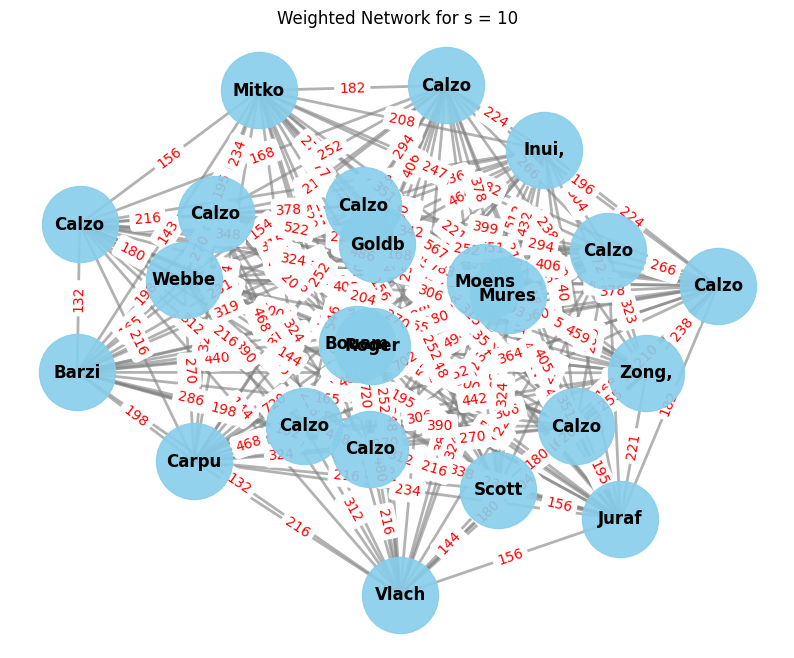

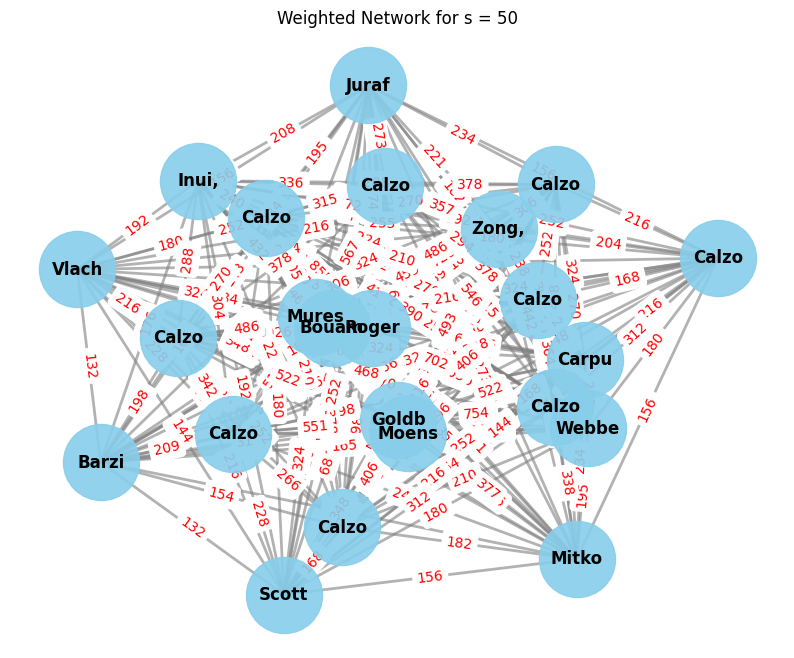

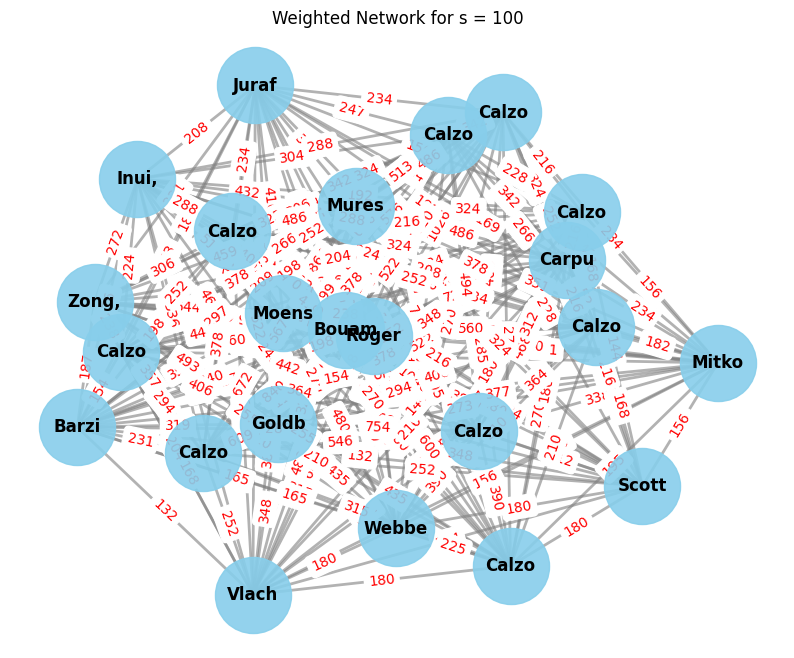

In [ ]:
import matplotlib.pyplot as plt

# Define a function to summarize node names
def summarize_node_name(node_name):
    return node_name[:5]

# Visualize each weighted network
for i, G in enumerate(weighted_networks):
    plt.figure(figsize=(10, 8))
    plt.title("Weighted Network for s = {}".format(s_values[i]))
    pos = nx.spring_layout(G)  # Position nodes using the Fruchterman-Reingold force-directed algorithm
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.9)
    # Draw edges
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray')
    # Draw labels (weights)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
    # Modify node labels to summarize node names
    node_labels = {node: summarize_node_name(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', font_weight='bold')
    plt.axis('off')
    plt.show()



In [ ]:
import networkx as nx

# Function to find communities in a weighted network
def find_communities(G):
    communities = list(nx.algorithms.community.greedy_modularity_communities(G, weight='weight'))
    return communities

# Iterate over the weighted networks and find communities for different k-values
k_values = [2, 3, 4]  # Example k-values, you can adjust as needed

for s, G in zip(s_values, weighted_networks):
    print("Communities for network with threshold s =", s)
    for k in k_values:
        print(f"Communities for k = {k}:")
        # Create a subgraph with top k edges
        top_k_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:k]
        G_sub = nx.Graph(top_k_edges)
        communities = find_communities(G_sub)
        for idx, community_nodes in enumerate(communities):
            print("Community", idx+1, ":", community_nodes)
        print("-------------------------")






Communities for network with threshold s = 10
Communities for k = 2:
Community 1 : frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika', 'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki', 'Goldberg,Yoav,Kozareva,Zornitsa,Zhang,Yue'})
-------------------------
Communities for k = 3:
Community 1 : frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika', 'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki', 'Goldberg,Yoav,Kozareva,Zornitsa,Zhang,Yue'})
-------------------------
Communities for k = 4:
Community 1 : frozenset({'Muresan,Smaranda,Nakov,Preslav,Villavicencio,Aline', 'Goldberg,Yoav,Kozareva,Zornitsa,Zhang,Yue', 'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki', 'Bouamor,Houda,Pino,Juan,Bali,Kalika'})
-------------------------
Communities for network with threshold s = 50
Communities for k = 2:
Community 1 : frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika', 'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki', 'Goldberg,Yoav,Kozareva,Zornitsa,Zhang,Yue'})
-------------------------
Communities for k = 3:
Com

In [35]:
L1_items = set(L1.keys())
L2_items = set(L2.keys())

In [36]:
print(L2_items)

{frozenset({'Calzolari,Nicoletta,Choukri,Khalid,Declerck,Thierry,Dougan,MehmetUugur,Maegaard,Bente,Mariani,Joseph,Moreno,Asuncion,Odijk,Jan,Piperidis,Stelios', 'Carpuat,Marine,deMarneffe,MarieCatherine,MezaRuiz,IvanVladimir'}), frozenset({'Rogers,Anna,BoydGraber,Jordan,Okazaki,Naoaki', 'Vlachos,Andreas,Augenstein,Isabelle'}), frozenset({'Calzolari,Nicoletta,Choukri,Khalid,Gangemi,Aldo,Maegaard,Bente,Mariani,Joseph,Odijk,Jan,Tapias,Daniel', 'Goldberg,Yoav,Kozareva,Zornitsa,Zhang,Yue'}), frozenset({'Calzolari,Nicoletta,Choukri,Khalid,Maegaard,Bente,Mariani,Joseph,Odijk,Jan,Piperidis,Stelios,Rosner,Mike,Tapias,Daniel', 'Calzolari,Nicoletta,Choukri,Khalid,Maegaard,Bente,Mariani,Joseph,Odijk,Jan,Piperidis,Stelios,Tapias,Daniel'}), frozenset({'Bouamor,Houda,Pino,Juan,Bali,Kalika', 'Calzolari,Nicoletta,Choukri,Khalid,Declerck,Thierry,Loftsson,Hrafn,Maegaard,Bente,Mariani,Joseph,Moreno,Asuncion,Odijk,Jan,Piperidis,Stelios'}), frozenset({'Bender,EmilyM,Derczynski,Leon,Isabelle,Pierre', 'Calzola

# 3-Tuples and 4-Tuples

In [37]:
# 3-tuples
%time
from time import time
start = time()
PERIOD_OF_TIME = 20 # in seconds

# find frequent 3-tuples
C3 = {}
for key in readdata(k=3):

    # filter out non-frequent tuples
    # A-Priori filtering, option 2: generate all possible subsets and check that they all are frequent
    non_freq_1 = set([frozenset(x) for x in itertools.combinations(list(key), 1)]) - L1_items
    if len(non_freq_1) > 0:
        continue

    non_freq_2 = set([frozenset(x) for x in itertools.combinations(list(key), 2)]) - L2_items
    if len(non_freq_2) > 0:
        continue

    # record frequent tuples
    if key not in C3:
        C3[key] = 1
    else:
        C3[key] += 1

    ################################
    # break out of a slow function #
    if time() > start + PERIOD_OF_TIME :
       print('Time is running out')
       break

print("{} items".format(len(C3)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Time is running out
278 items


In [38]:
Ntest = 5

# filter stage
L3 = {}
for key, count in C3.items():
    if count >= Ntest:
        L3[key] = count
print('{} items with >{} occurances'.format(len(L3), Ntest))

277 items with >5 occurances


In [39]:
L1_items = set(L1.keys())
L2_items = set(L2.keys())
L3_items = set(L3.keys())

In [ ]:
# 4-tuples
%time
from time import time
import itertools

start = time()
PERIOD_OF_TIME = 20  # in seconds

# Find frequent 4-tuples
C4 = {}
for key in readdata(k=4):

    # Filter out non-frequent tuples using A-Priori filtering
    non_freq_1 = set([frozenset(x) for x in itertools.combinations(list(key), 1)]) - L1_items
    if len(non_freq_1) > 0:
        continue

    non_freq_2 = set([frozenset(x) for x in itertools.combinations(list(key), 2)]) - L2_items
    if len(non_freq_2) > 0:
        continue

    non_freq_3 = set([frozenset(x) for x in itertools.combinations(list(key), 3)]) - L3_items
    if len(non_freq_3) > 0:
        continue

    # Record frequent tuples
    if key not in C4:
        C4[key] = 1
    else:
        C4[key] += 1

    #Check time constraint
    if time() > start + PERIOD_OF_TIME:
       print('Time is running out')
       break

print("{} items".format(len(C4)))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [ ]:
Ntest = 5

# filter stage
L4 = {}
for key, count in C4.items():
    if count >= Ntest:
        L4[key] = count
print('{} items with >{} occurances'.format(len(L4), Ntest))

277 items with >5 occurances


# PCY

In [ ]:
import numpy as np

#s = 100  # frequency threshold

In [ ]:
# hash table
max_hash1 = 10*1000000
H1 = np.zeros((max_hash1,), dtype=np.int32)
for key in readdata(k=2, report=False):
    hash_cell_1 = hash(key) % max_hash1
    H1[hash_cell_1] += 1

In [ ]:
C2_items = set([a.union(b) for a in L1.keys() for b in L1.keys()]) # List comprehensions in python

In [ ]:
# compact hash table
H_good_1 = set(np.where(H1 >= s)[0])

del H1

In [ ]:
# find frequent 2-tuples
%time
C2 = {}
for key in readdata(k=2):
    # hash-based filtering stage from PCY
    hash_cell_1 = hash(key) % max_hash1
    if hash_cell_1 not in H_good_1:
        continue

    # filter out non-frequent tuples
    if key not in C2_items:
        continue

    # record frequent tuples
    if key not in C2:
        C2[key] = 1
    else:
        C2[key] += 1

print("{} items".format(len(C2)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
317 items


In [ ]:
%time
s_values = [10, 50, 100]

for s in s_values:
    L2 = {}
    for key, count in C2.items():
        if count >= s:
            L2[key] = count
    print('PCY : {} items with >{} occurrences'.format(len(L2), s))


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
PCY : 317 items with >10 occurrences
PCY : 317 items with >50 occurrences
PCY : 317 items with >100 occurrences


In [ ]:
import numpy as np
import time

# Define support values
s_values = [10, 50, 100]

# Iterate over each support value
for s in s_values:
    # Measure execution time for each support value
    start_time = time.time()

    # Initialize parameters
    max_hash1 = 5 * 1000000 - 673
    max_hash2 = 5 * 1000000 + 673
    max_hash3 = 5 * 1000000 + 257
    max_hash4 = 5 * 1000000 - 257
    max_hash5 = 5 * 1000000 + 31

    # Initialize hash tables
    H1 = np.zeros((max_hash1,), dtype=np.int32)
    H2 = np.zeros((max_hash2,), dtype=np.int32)
    H3 = np.zeros((max_hash3,), dtype=np.int32)
    H4 = np.zeros((max_hash4,), dtype=np.int32)
    H5 = np.zeros((max_hash5,), dtype=np.int32)

    # Iterate over dataset and fill hash tables
    for key in readdata(k=2, report=False):
        hash_cell_1 = hash(key) % max_hash1
        H1[hash_cell_1] += 1

        hash_cell_2 = hash(key) % max_hash2
        H2[hash_cell_2] += 1

        hash_cell_3 = hash(key) % max_hash3
        H3[hash_cell_3] += 1

        hash_cell_4 = hash(key) % max_hash4
        H4[hash_cell_4] += 1

        hash_cell_5 = hash(key) % max_hash5
        H5[hash_cell_5] += 1

    # Filter cells with counts >= s
    H_good_1 = set(np.where(H1 >= s)[0])
    H_good_2 = set(np.where(H2 >= s)[0])
    H_good_3 = set(np.where(H3 >= s)[0])
    H_good_4 = set(np.where(H4 >= s)[0])
    H_good_5 = set(np.where(H5 >= s)[0])

    # Iterate over dataset again to count frequent 2-tuples
    C2 = {}
    for key in readdata(k=2):
        # Hash-based filtering
        hash_cell_1 = hash(key) % max_hash1
        if hash_cell_1 not in H_good_1:
            continue

        hash_cell_2 = hash(key) % max_hash2
        if hash_cell_2 not in H_good_2:
            continue

        hash_cell_3 = hash(key) % max_hash3
        if hash_cell_3 not in H_good_3:
            continue

        hash_cell_4 = hash(key) % max_hash4
        if hash_cell_4 not in H_good_4:
            continue

        hash_cell_5 = hash(key) % max_hash5
        if hash_cell_5 not in H_good_5:
            continue

        # Filter out non-frequent tuples
        if key not in C2_items:
            continue

        # Record frequent tuples
        if key not in C2:
            C2[key] = 1
        else:
            C2[key] += 1

    # Print execution time and result for each support value
    print("Execution time for s = {}: {} seconds".format(s, time.time() - start_time))
    print("5 hash tables PCY {} items".format(len(C2)))


Execution time for s = 10: 32.10754728317261 seconds
5 hash tables PCY 325 items
Execution time for s = 50: 29.710164308547974 seconds
5 hash tables PCY 325 items
Execution time for s = 100: 30.751627922058105 seconds
5 hash tables PCY 317 items
